# Dimentionality reduction (PCA)

Principal Component Analysis (`PCA`) is a `dimensionality reduction` technique commonly used in machine learning and data analysis. The primary goal of PCA is to `transform high-dimensional data` into a `lower-dimensional` representation while `retaining` as much of the original variability or `information as possible`

!["pca_1"](imgs/pca_1.png)

+ choose between features F1 and F2 .
+ when remove `F2` we see points on `F1` but not give me `info`.
+ when remove `F1` we see points on `F2` and see `distance between points`, so give me `info`.
+ then we remove `F1` and train with `F2` because "`INFO IS DISTANCE`".

NOW, we lost some features of data! that not useful. so we use `PCA`

!["pca_2"](imgs/pca_2.png)

+ determine distance between `new point` and `original` AND create new feature between `new point` and `original`.
+ we see that distance between `new point` (6,3) and `original` (0,0) = `Root(sqrt(3)+ sqrt(6))`
+ we also see that mail is y1-y2 / x1-x2 = 3-0 / 6-0 = `1/2`
+ then we move with `four step on axis-X` move `two step on axis-Y`.
+ then we create a `new feature` with `part of F1` and `part of F2`, not remove `all F1` and use `all F2`.

Example in real world:

!["pca_3"](imgs/pca_3.png)

+ say F1 is height and F2 is width
+ we create a new feature with height and width called `perimeter`
+ perimeter = 1/2 height * 1/2 width
+ then we take `part of the height` and `part of width` to create a `perimeter` not remove feature and use another feature.

!["pca_4"](imgs/pca_4.png)

+ we have `n=2` `PCA_1 is sum of square distance = 12` and `PCA_2 sum of square distance = 4`. 

+ varation is average value for:
    - PCA_1 = ssd / n - 1 = 12 / 2 - 1 = 12
    - PCA_2 = ssd / n - 1 = 4 / 2 - 1 = 4

+ when we want to determine the `ratio of PCA_1` from save `info` of data we divide `PCA_1` / `Total PCA_1 and PCA_2` = 12 / 12 + 4 = `0.75`

+ when we want to determine the `ratio of PCA_2` from save `info` of data we divide `PCA_2` / `Total PCA_1 and PCA_2` = 4 / 12 + 4 = `0.25`

+ we let that list of PCAs say `first four PCAs save 97% from info` of data and `other PCAs save 3% from info` of data.

+ then when we `remove other PCAs` we `""minimize dimensional data""`. 

- dataset: https://www.kaggle.com/datasets/uciml/iris

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop("Id", axis=1, inplace=True)
df.head()

In [4]:
import seaborn as sns

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


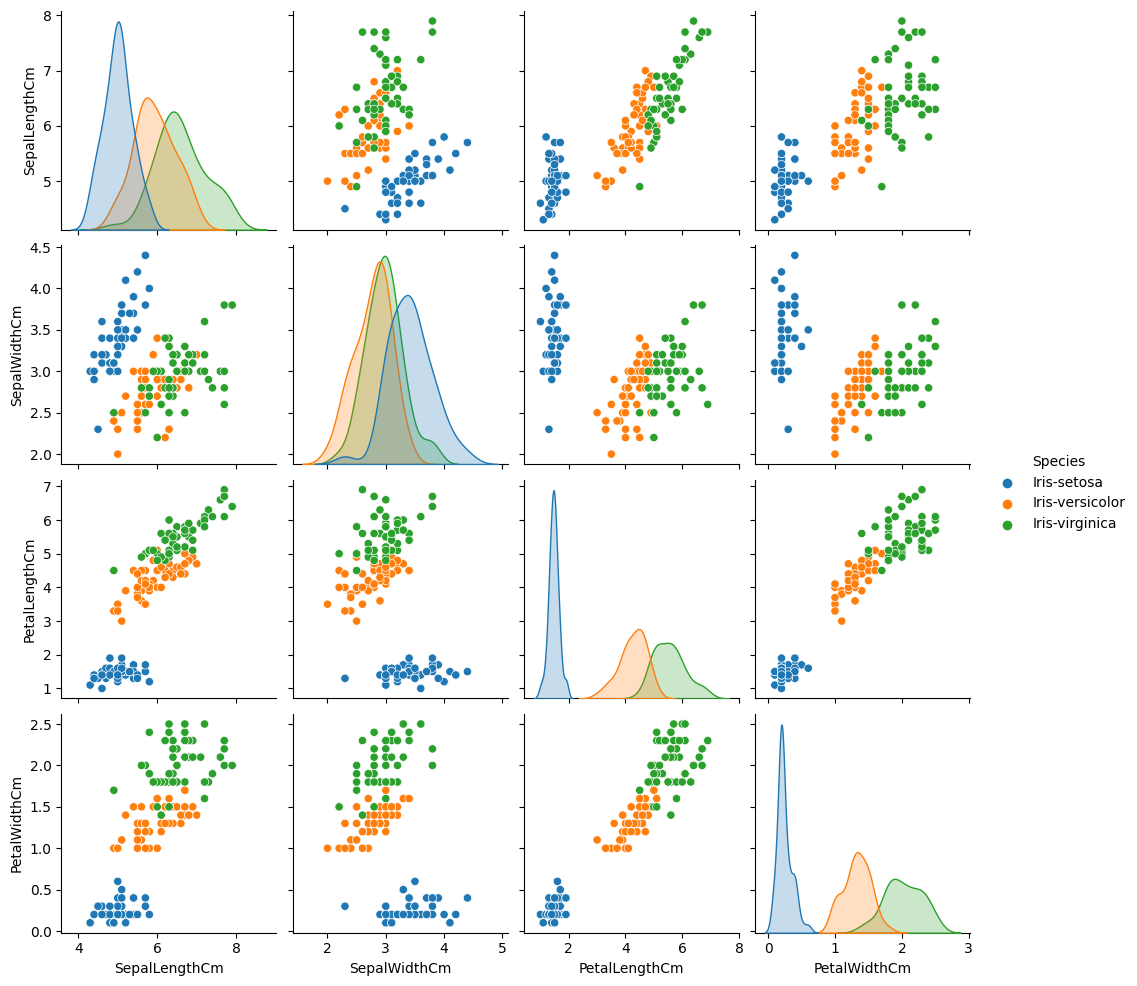

In [6]:
sns.pairplot(df, hue="Species")

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
x = df.drop("Species", axis=1)
y = df['Species']

In [12]:
x_scl = StandardScaler().fit_transform(x)
x_scl.shape

(150, 4)

- PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

+ Parameters:


+ `n_components` : int, float or ‘mle’, `default=None` (return same number of current features).

    + Number of components to keep. if n_components is not set all components are kept:

        - n_components == min(n_samples, n_features)

    + If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension. Use of n_components == 'mle' will interpret svd_solver == 'auto' as svd_solver == 'full'.

    + If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

    + If svd_solver == 'arpack', the number of components must be strictly less than the minimum of n_features and n_samples.

        - Hence, the None case results in:

        - n_components == min(n_samples, n_features) - 1

+ `copy` : bool, `default=True`
    + make changing on X or copy of X
    
    + If False, data passed to fit are `overwritten` and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.

+ `tol` float, `default=0.0`
    - let `random line` and give algorithm `value for sum of square distance` 
    
    - Tolerance for singular values computed by svd_solver == ‘arpack’. Must be of range [0.0, infinity).

In [13]:
from sklearn.decomposition import PCA

use default parameters

In [16]:
pca = PCA()
pca

PCA()

In [18]:
x_pca = pca.fit_transform(x_scl)
x_pca.shape

(150, 4)

we see `PCA` return `4 features` (same number of current features), because we use default parameters, use attribute `components_` to see `new features`.

In [19]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

we see `PCA` created `new 4 features` with combination of `old 4 features`, row is feature, use attribute `explained_variance_ratio_` to see ratio of PCAs from `save info of data`.

+ `explained_variance_ratio_` : ndarray of shape (n_components,)

    - Percentage of variance explained by each of the selected components.

    - If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

In [20]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

+ we see ratio of features: 
    - `feature_1` save `72.77%` of info in data.
    - `feature_2` save `23.03%` of info in data.
    - `feature_3` save `3.6%` of info in data.
    - `feature_4` save `0.51%` of info in data.

Now, we want to see names of features, so we use method `get_feature_names_out`.

In [22]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3'], dtype=object)

+ then first two principal components (`PC0 and PC1`), which together explain approximately `95.80%` of the total variance.

PLot PCAs 

In [23]:
df_pca = pd.DataFrame(x_pca, columns=pca.get_feature_names_out())
df_pca.head()

,pca0,pca1,pca2,pca3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [25]:
df_pca['Species'] = df['Species']
df_pca.head()

,pca0,pca1,pca2,pca3,Species
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


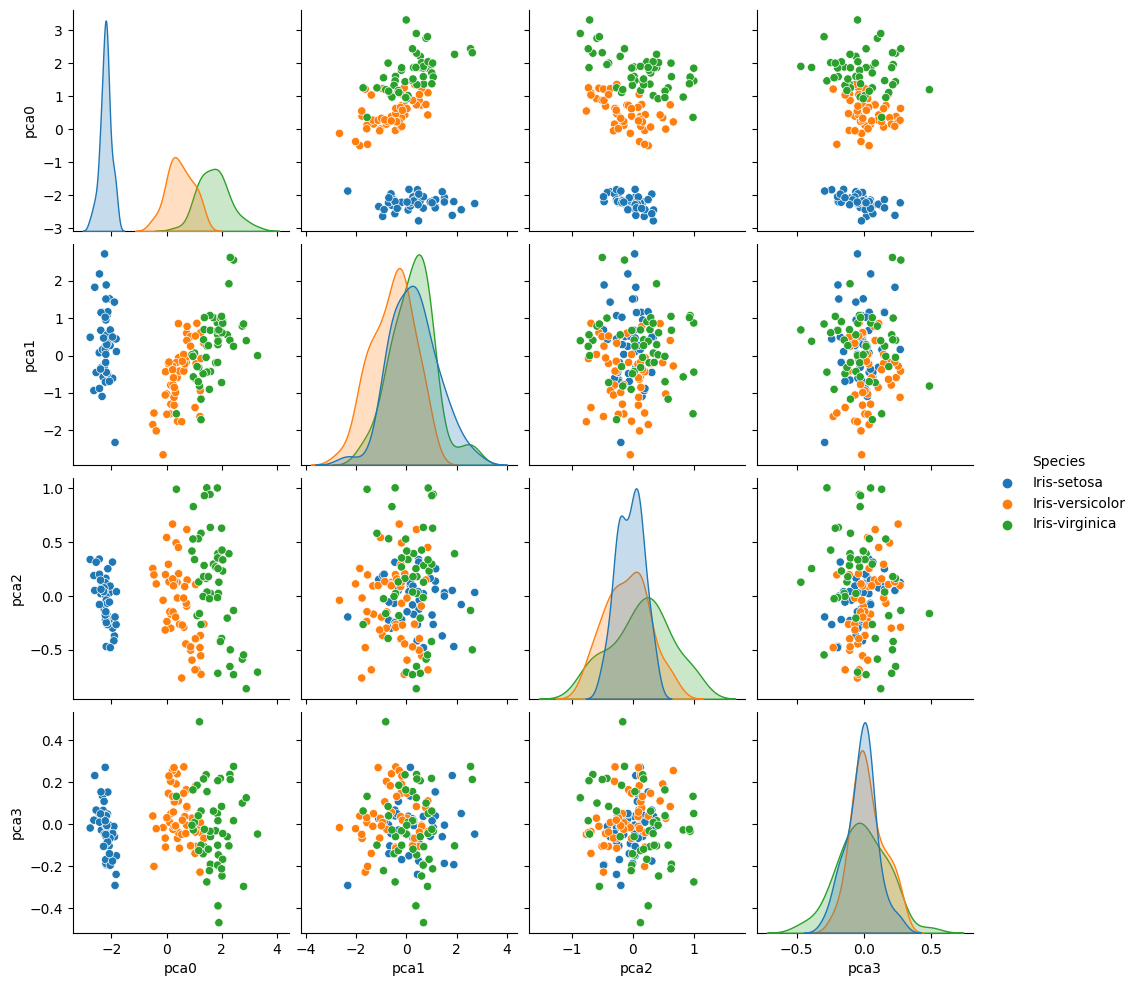

In [26]:
sns.pairplot(df_pca, hue='Species')

+ we see that `pca0` plot good graph with all other features, that is because of `pca0` save `72% of info in data`

+ then `pca0` in the `important feature` in data.

+ `PC0 and PC1` together explain approximately `95.80%` of info in data, so we can `remove two other features` and use `first two features`.

+ Now `remove half of features` and use `first two features` that `increase performance of model` because we use only `useful features`.

!["pca_5"](imgs/pca_5.png)

+ we now that we use default parameters of `PCA` which are `n_components` same number of `current features = 4`.

+ in case change parameter `n_components` to `2 features`, PCA `not change` but return `first two features` only which are with ratio `95.80%`